<a href="https://colab.research.google.com/github/ranctor17/ADALL.Github/blob/main/Copy_of_3582904N__ADALL_Practical_Test_Vehicle_Sales_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADALL Practical Test – Regression (Vehicle Sales)

**Dataset:** `syedanwarafridi/vehicle-sales-data` → `car_prices.csv`  
**Goal:** Build a regression model to predict **selling price** using basic vehicle attributes.

## Guide for this practical test
- Focus on a **clear workflow**
- Keep code **readable** and **stable**.
- Answer short questions in **markdown** cells.
- You may run cells step-by-step and check outputs.

##Data Dictionary

sellingprice:
The price at which the vehicle was sold.

year: The manufacturing year of the vehicle.

make:
The brand or manufacturer of the vehicle.

model:
The specific model of the vehicle.

body:
The body type of the vehicle (e.g., SUV, Sedan).

transmission:
The type of transmission in the vehicle (e.g., automatic).

odometer:
The mileage or distance traveled by the vehicle.

condition:
Condition of the vehicle, rated on a scale.



## Section 0) Setup

This notebook uses **kagglehub** to download the dataset directly into Colab.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Section 1) Download and load the dataset.
###Run the following code exactly as shown for Section 1. Do not edit it, or your results and answers may differ from the expected output.

In [4]:
import kagglehub
path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")
print("Downloaded to:", path)
print("Files:", os.listdir(path))
csv_path = os.path.join(path, "car_prices.csv")
df = pd.read_csv(csv_path)

Using Colab cache for faster access to the 'vehicle-sales-data' dataset.
Downloaded to: /kaggle/input/vehicle-sales-data
Files: ['car_prices.csv']


In [5]:
target_col = "sellingprice"
feature_cols = [
    "year",
    "make",
    "model",
    "body",
    "transmission",
    "odometer",
    "condition",
]
df = df[feature_cols + [target_col]].copy()
df = df.dropna()
df = df.sample(5000, random_state=42)

##Section 2) Inspection + AI-assisted cleaning

**Important Note**
- You are free to modify the given code in this section, including the following block, such as adding additional queries, as you deem necessary.
- You do not need to submit this block of modified code, if applicable.



In [7]:
import pandas as pd
import numpy as np
from io import StringIO

# Initialize df_clean with the current state of df for initial profiling
df_clean = df.copy()

# ---------------------------
# Generate a full dataset profile using df_clean
# ---------------------------

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df_clean.dtypes.to_string())
buffer.write("\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df_clean.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df_clean.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df_clean.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df_clean))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# outlier summary (using log-transformed values where applicable)
buffer.write("=== OUTLIER SUMMARY (IQR METHOD - on original numericals) ===\n")
# Profile original numeric columns as feature engineering (log transform, car_age) happens later.
profiling_num_cols = ['odometer', 'sellingprice', 'year', 'condition']

Q1 = df_clean[profiling_num_cols].quantile(0.25)
Q3 = df_clean[profiling_num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_clean[profiling_num_cols] < (Q1 - 1.5*IQR)) | (df_clean[profiling_num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df_clean.duplicated().sum()
constant_cols = df_clean.columns[df_clean.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df_clean)}, Columns: {df_clean.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

# Add value counts for categorical and condition for ranking context
buffer.write("=== CATEGORICAL VALUE COUNTS (TOP 10) AND CONDITION ===\n")
# Use original categorical columns as 'make_grouped' is created later
for col in ['make', 'model', 'body', 'transmission']:
    buffer.write(f"--- {col} ---\n")
    buffer.write(df_clean[col].value_counts().head(10).to_string())
buffer.write("\n\n")

buffer.write("--- condition ---\n")
buffer.write(df_clean['condition'].value_counts().sort_index().to_string())
buffer.write("\n\n")


# Final text
payload_text = buffer.getvalue()

print(payload_text)


=== DTYPES ===
year              int64
make             object
model            object
body             object
transmission     object
odometer        float64
condition       float64
sellingprice    float64

=== NUMERIC DESCRIBE ===
              year       odometer   condition   sellingprice
count  5000.000000    5000.000000  5000.00000    5000.000000
mean   2010.236800   67335.086600    30.78680   13773.646000
std       3.742129   51236.131912    13.28692    9522.803444
min    1991.000000       1.000000     1.00000     200.000000
25%    2008.000000   28759.500000    24.00000    7200.000000
50%    2012.000000   52177.000000    34.50000   12300.000000
75%    2013.000000   96431.000000    41.00000   18300.000000
max    2015.000000  380347.000000    49.00000  111000.000000

=== CATEGORICAL DESCRIBE ===
        make   model   body transmission
count   5000    5000   5000         5000
unique    43     449     48            2
top     Ford  Altima  Sedan    automatic
freq     850     173   1

In [9]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

##Task for question 1 and 2

1. Create a request using the OpenAI API client.
2. Use client.responses.create with appropriate instructions and input to request the necessary steps and code for data cleaning, without encoding first.
3. Copy your request code to Politemall Q1
4. Copy GenAI recommended code to 2 blocks below. You are required to review and modify if necessary.
4. Copy your modified GenAI response and add your written review for each recommendations returned by the model to Politemall Q2

In [11]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are are expert data scientist researching on test vehicle sales.
""",
    input=f"""
Dataset info: {payload_text}
Questions: This is for data preparation. From the dataset, highlight any data quality issues. Display profile and show all column and row for missing value or duplicate value.
""")

print(response.output_text)



Summary profile (based on the information you provided)
- Rows / columns: 5000 rows × 8 columns
- Dtypes: year (int64), make/model/body/transmission (object), odometer/condition/sellingprice (float64)
- No missing values reported: null_count = 0 for every column
- Duplicate rows reported: 0
- Numeric summary (key points):
  - year: min 1991, max 2015, mean 2010.24, IQR outliers flagged: 92 rows
  - odometer: mean ~67k, wide spread (std ~51k), IQR outliers flagged: 102 rows
  - condition: mean ~30.8, but values range 1 → 49 (see “Issues” below)
  - sellingprice: mean ~13.8k, wide spread, IQR outliers flagged: 141 rows
- Categorical overview:
  - make: 43 unique; top = Ford (850)
  - model: 449 unique; top = Altima (173)
  - body: 48 unique; top categories include "Sedan" (1794) and "sedan" (381) — mixed-casing duplicates
  - transmission: 2 unique values, highly imbalanced (automatic = 4836, manual = 164)

Data quality issues (actionable)
1. No missing values or exact duplicate rows
   

### Investigating the 'condition' column

In [12]:
print("Unique values in 'condition' column:", df['condition'].unique())
print("\nValue counts for 'condition' column:")
print(df['condition'].value_counts().sort_index())

Unique values in 'condition' column: [49. 22. 35. 37.  3. 44. 28.  2. 27. 41. 19.  4. 25. 48. 34.  5. 24. 45.
 21. 26. 47. 46. 33.  1. 29. 42. 43. 38. 36. 32. 31. 23. 39. 18. 17. 11.
 15.]

Value counts for 'condition' column:
condition
1.0      64
2.0     155
3.0     119
4.0     184
5.0     106
11.0      4
15.0      2
17.0      4
18.0      2
19.0    395
21.0     76
22.0     42
23.0     65
24.0     74
25.0    108
26.0    106
27.0    173
28.0    182
29.0    184
31.0     77
32.0    105
33.0    112
34.0    161
35.0    207
36.0    197
37.0    261
38.0    180
39.0    201
41.0    221
42.0    226
43.0    224
44.0    223
45.0    118
46.0    110
47.0    109
48.0    103
49.0    120
Name: count, dtype: int64


### Manually inspecting rows with extreme 'odometer' and 'sellingprice' values and 'odometer == 1'

In [13]:
# Display rows with 'odometer' outliers
Q1_odo = df['odometer'].quantile(0.25)
Q3_odo = df['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo
outliers_odometer = df[(df['odometer'] < Q1_odo - 1.5*IQR_odo) | (df['odometer'] > Q3_odo + 1.5*IQR_odo)]
print("\nRows with 'odometer' outliers (first 5):")
display(outliers_odometer.head())

# Display rows with 'sellingprice' outliers
Q1_price = df['sellingprice'].quantile(0.25)
Q3_price = df['sellingprice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
outliers_sellingprice = df[(df['sellingprice'] < Q1_price - 1.5*IQR_price) | (df['sellingprice'] > Q3_price + 1.5*IQR_price)]
print("\nRows with 'sellingprice' outliers (first 5):")
display(outliers_sellingprice.head())

# Display rows where 'odometer' is 1
odometer_one_rows = df[df['odometer'] == 1]
print("\nRows where 'odometer' is 1:")
display(odometer_one_rows)


Rows with 'odometer' outliers (first 5):


,year,make,model,body,transmission,odometer,condition,sellingprice
131018,2001,Toyota,Camry,Sedan,automatic,201092.0,26.0,1600.0
94807,2002,Volvo,S60,Sedan,automatic,253036.0,1.0,300.0
378865,2005,Ford,F-250 Super Duty,SuperCab,automatic,234782.0,19.0,3300.0
354046,2005,Chevrolet,Tahoe,SUV,automatic,203228.0,32.0,4700.0
156078,2002,Mazda,Millenia,Sedan,automatic,222789.0,31.0,900.0



Rows with 'sellingprice' outliers (first 5):


,year,make,model,body,transmission,odometer,condition,sellingprice
325634,2014,Audi,S4,Sedan,automatic,13366.0,37.0,42000.0
378688,2014,Chevrolet,Tahoe,SUV,automatic,39264.0,5.0,39800.0
472153,2013,Chevrolet,Silverado 2500HD,crew cab,automatic,40542.0,47.0,38500.0
180241,2013,Ford,F-150,SuperCrew,automatic,10581.0,44.0,37600.0
426909,2012,BMW,7 Series,Sedan,automatic,19939.0,42.0,38750.0



Rows where 'odometer' is 1:


,year,make,model,body,transmission,odometer,condition,sellingprice
156236,1999,Ford,F-150,Extended Cab,automatic,1.0,19.0,1100.0
405181,2014,Hyundai,Santa Fe,SUV,automatic,1.0,1.0,1300.0
41321,1996,Mercedes-Benz,E-Class,Sedan,automatic,1.0,2.0,300.0
414219,2005,Buick,Century,Sedan,automatic,1.0,19.0,900.0
17542,2007,Chevrolet,Tahoe,SUV,automatic,1.0,19.0,5600.0
298277,2003,Hyundai,Elantra,Sedan,automatic,1.0,1.0,425.0
500300,2000,Nissan,Xterra,suv,automatic,1.0,19.0,300.0
55531,2004,GMC,Envoy XL,SUV,automatic,1.0,19.0,1050.0
329164,2004,Hyundai,Accent,Sedan,manual,1.0,3.0,300.0
181556,2008,Cadillac,DTS,Sedan,automatic,1.0,1.0,2300.0


### Normalizing categorical text (strip, lower) and standardizing 'transmission' values

In [14]:
df_clean = df.copy() # Create a clean copy to apply transformations

categorical_cols = df_clean.select_dtypes(include='object').columns

for col in categorical_cols:
    df_clean[col] = df_clean[col].str.lower().str.strip()

print("\nTransmission values after normalization:")
print(df_clean['transmission'].value_counts())

print("\nFirst 5 rows of cleaned categorical columns:")
display(df_clean[categorical_cols].head())


Transmission values after normalization:
transmission
automatic    4836
manual        164
Name: count, dtype: int64

First 5 rows of cleaned categorical columns:


,make,model,body,transmission
158048,mitsubishi,outlander sport,suv,manual
195178,hyundai,tiburon,hatchback,automatic
85388,chrysler,200,sedan,automatic
333139,ford,escape,suv,automatic
338466,chevrolet,cruze,sedan,automatic


### Log-transforming 'odometer' and 'sellingprice' for modeling

In [15]:
# Apply log1p transformation (log(1+x)) to handle zero or positive values better
df_clean['log_odometer'] = np.log1p(df_clean['odometer'])
df_clean['log_sellingprice'] = np.log1p(df_clean['sellingprice'])

print("\nOriginal vs Log-transformed 'odometer' and 'sellingprice' (first 5 rows):")
display(df_clean[['odometer', 'log_odometer', 'sellingprice', 'log_sellingprice']].head())

# Alternatively, if you wanted to consider robust scalers (code commented out)
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# df_clean[['odometer_scaled', 'sellingprice_scaled']] = scaler.fit_transform(df_clean[['odometer', 'sellingprice']])
# print("\nRobust Scaled 'odometer' and 'sellingprice' (first 5 rows - if used):")
# display(df_clean[['odometer', 'odometer_scaled', 'sellingprice', 'sellingprice_scaled']].head())


Original vs Log-transformed 'odometer' and 'sellingprice' (first 5 rows):


,odometer,log_odometer,sellingprice,log_sellingprice
158048,19475.0,9.876938,12000.0,9.392745
195178,77583.0,11.259116,2000.0,7.601402
85388,32998.0,10.404233,10500.0,9.259226
333139,86281.0,11.365376,8700.0,9.071193
338466,20124.0,9.909718,13400.0,9.503085


### Creating derived features (e.g., car age)

In [16]:
CURRENT_YEAR = 2024 # Assuming the current year for age calculation
df_clean['car_age'] = CURRENT_YEAR - df_clean['year']

print("\n'year' and derived 'car_age' (first 5 rows):")
display(df_clean[['year', 'car_age']].head())


'year' and derived 'car_age' (first 5 rows):


,year,car_age
158048,2013,11
195178,2008,16
85388,2013,11
333139,2011,13
338466,2014,10


### Grouping rare 'make' categories

In [17]:
RARE_THRESHOLD = 0.01 # Categories that make up less than 1% of the total

# Identify rare 'make' categories
make_counts = df_clean['make'].value_counts(normalize=True)
rare_makes = make_counts[make_counts < RARE_THRESHOLD].index

# Replace rare 'make' categories with 'other'
df_clean['make_grouped'] = df_clean['make'].replace(rare_makes, 'other')

print("\n'make' value counts before grouping (top 10):")
print(df_clean['make'].value_counts().head(10))

print("\n'make_grouped' value counts after grouping (top 10):")
print(df_clean['make_grouped'].value_counts().head(10))


'make' value counts before grouping (top 10):
make
ford         850
chevrolet    571
nissan       465
toyota       404
dodge        297
honda        247
bmw          206
hyundai      176
infiniti     175
kia          160
Name: count, dtype: int64

'make_grouped' value counts after grouping (top 10):
make_grouped
ford         850
chevrolet    571
nissan       465
other        464
toyota       404
dodge        297
honda        247
bmw          206
hyundai      176
infiniti     175
Name: count, dtype: int64


##Section 3) Inspection after cleaning

As this dataset uses **sellingprice** as the target column, the following blocks in this section are intended to support your success in the practical test. There is no question or task for you to complete in this section. You can run the codes as it is.

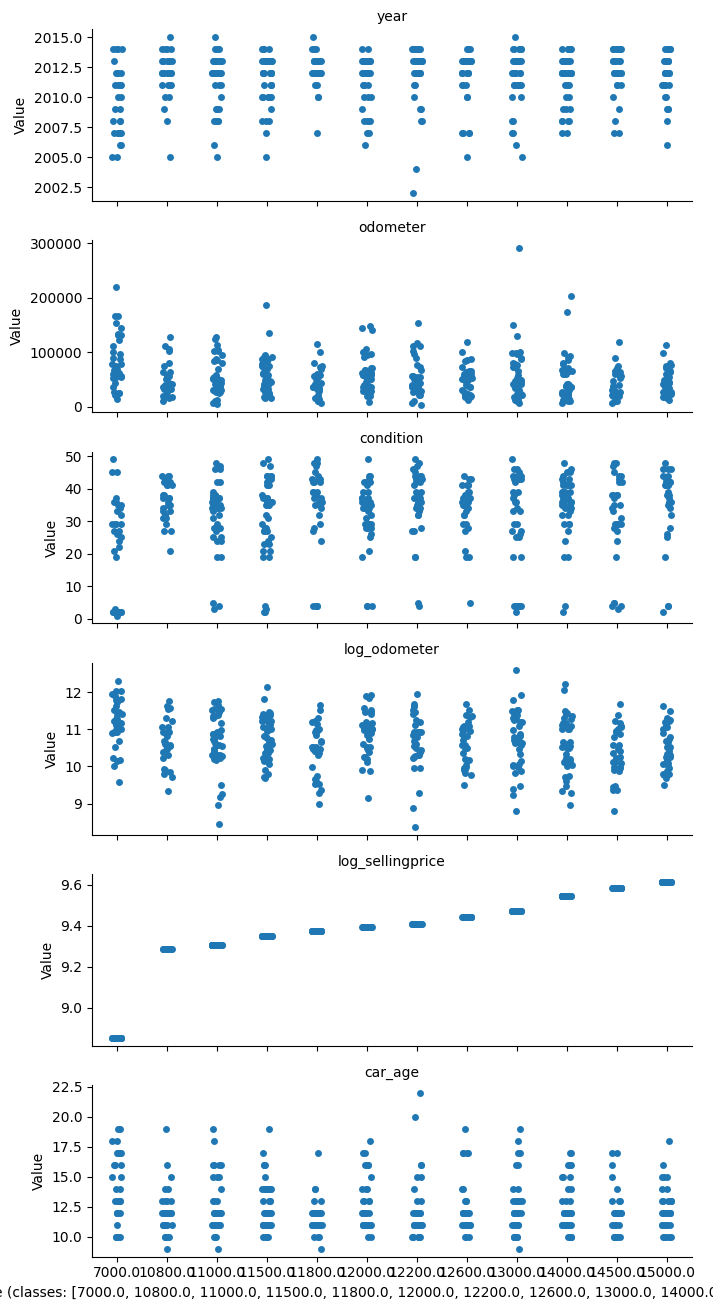

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_numeric_fast(
    df: pd.DataFrame,
    target_col: str,
    num_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",  # "auto" | "sorted" | "freq"
    dropna_target: bool = True
):
    """
    Fast jitter plot for numeric features vs a discrete target.

    x = target classes
    y = numeric feature values (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect class order if not provided
    if order is None:
        y = d[target_col]

        # If numeric-like (includes integer-coded), prefer sorted unique
        if pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y)
            # remove NaN if present
            uniq = [v for v in uniq if pd.notna(v)]
            order = sorted(uniq)

            # If too many unique values, keep most frequent ones
            if len(order) > max_classes:
                top = y.value_counts().head(max_classes).index.tolist()
                order = sorted(top)

        else:
            # For non-numeric target, default to most frequent classes
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()

            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order  # already by frequency
            else:
                # auto: if categories have natural order (pandas Categorical ordered), preserve it
                if pd.api.types.is_categorical_dtype(y) and y.cat.ordered:
                    order = list(y.cat.categories)
                    if len(order) > max_classes:
                        order = vc.head(max_classes).index.tolist()

    # Filter df to those classes
    d = d[d[target_col].isin(order)].copy()

    # Sample for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect numeric feature columns
    if num_cols is None:
        num_cols = d.select_dtypes(include="number").columns.tolist()
        num_cols = [c for c in num_cols if c != target_col]

    # Keep only existing columns
    num_cols = [c for c in num_cols if c in d.columns]

    if len(num_cols) == 0:
        raise ValueError("No numeric columns found to plot (after excluding target_col).")

    num_cols = num_cols[:max_features]

    # Long form for faceting
    long_df = d.melt(
        id_vars=[target_col],
        value_vars=num_cols,
        var_name="feature",
        value_name="value"
    ).dropna(subset=["value"])

    # Make target explicitly ordered categorical so seaborn respects the x order
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Value")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, num_cols


# Example:
order_used, num_cols_used = jitter_numeric_fast(df_clean, target_col="sellingprice", sample=15000)
# print("Order used:", order_used)
# print("Numeric columns plotted:", num_cols_used)


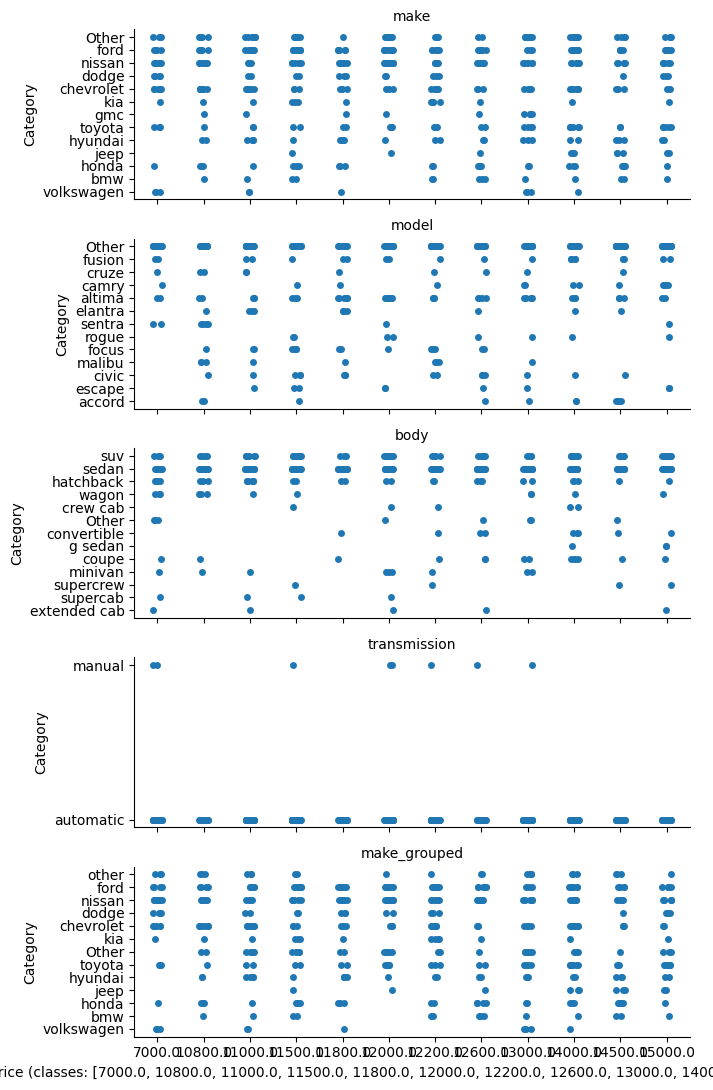

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_categorical_fast(
    df: pd.DataFrame,
    target_col: str,
    cat_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",      # "auto" | "sorted" | "freq"
    dropna_target: bool = True,
    top_k: int = 15,                # keep top categories per feature, rest -> "Other"
    dropna_feature: bool = False,   # if False, show missing as "(Missing)"
    missing_label: str = "(Missing)"
):
    """
    Fast jitter plot for categorical features vs a discrete target.

    x = target classes
    y = categorical feature levels (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')

    Notes:
    - For each categorical feature, rare categories are collapsed into "Other" (top_k kept).
    - Uses seaborn catplot (row facets), like jitter_numeric_fast.
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect class order if not provided
    if order is None:
        y = d[target_col]

        # Numeric-like targets: prefer sorted unique
        if pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y)
            uniq = [v for v in uniq if pd.notna(v)]
            order = sorted(uniq)

            if len(order) > max_classes:
                top = y.value_counts().head(max_classes).index.tolist()
                order = sorted(top)

        else:
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()

            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order
            else:
                # auto: if pandas ordered categorical, preserve it
                if pd.api.types.is_categorical_dtype(y) and y.cat.ordered:
                    order = list(y.cat.categories)
                    if len(order) > max_classes:
                        order = vc.head(max_classes).index.tolist()

    # Filter df to those classes
    d = d[d[target_col].isin(order)].copy()

    # Sample for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect categorical feature columns
    if cat_cols is None:
        cat_cols = d.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
        cat_cols = [c for c in cat_cols if c != target_col]

    # Keep only existing columns
    cat_cols = [c for c in cat_cols if c in d.columns and c != target_col]

    if len(cat_cols) == 0:
        raise ValueError("No categorical columns found to plot (after excluding target_col).")

    cat_cols = cat_cols[:max_features]

    # Build long form with per-feature top_k collapsing
    frames = []
    for c in cat_cols:
        s = d[c]

        if dropna_feature:
            s = s.dropna()
            tmp = d.loc[s.index, [target_col]].copy()
            tmp[c] = s.astype("object")
        else:
            tmp = d[[target_col]].copy()
            tmp[c] = s.astype("object").fillna(missing_label)

        vc = tmp[c].value_counts(dropna=False)
        keep = vc.head(top_k).index
        tmp[c] = tmp[c].where(tmp[c].isin(keep), other="Other")

        tmp = tmp.rename(columns={c: "value"})
        tmp["feature"] = c
        frames.append(tmp[[target_col, "feature", "value"]])

    long_df = pd.concat(frames, ignore_index=True)

    # Make target explicitly ordered categorical so seaborn respects x order
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Category")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, cat_cols


# Example:
order_used, cat_cols_used = jitter_categorical_fast(df_clean, target_col="sellingprice", sample=15000, top_k=12)
# print("Order used:", order_used)
# print("Categorical columns plotted:", cat_cols_used)


##Section 4) Train-test split

 There is no question or task for you to complete in this section. You can run the codes as it is.


In [20]:
X = df_clean[['year', 'log_odometer', 'car_age', 'make_grouped', 'model', 'body', 'transmission', 'condition']]
y = df_clean[target_col]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (4000, 8)
Test shape : (1000, 8)


##Section 5) Encoding


##Task for question 3
###Meaningful Ranking Encoding

Perform AI-assisted ranking (Generative AI supported). Uses a Generative AI model to infer ordering based on semantic meaning or external knowledge. A structure has been provided for you below.

Complete and copy all the codes within this section to Politemall Q3.

In [22]:
numeric_features = X_train.select_dtypes(exclude=["object"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

In [23]:
categorical_info = StringIO()

categorical_info.write("Categorical Columns and their Unique Values:\n")
for col in categorical_features:
    unique_vals = X_train[col].unique().tolist()

    categorical_info.write(f"- {col}: {unique_vals}\n")

categorical_string = categorical_info.getvalue()
print(categorical_string)


Categorical Columns and their Unique Values:
- make_grouped: ['cadillac', 'ford', 'toyota', 'infiniti', 'jeep', 'other', 'lexus', 'kia', 'chevrolet', 'chrysler', 'nissan', 'mercedes-benz', 'volkswagen', 'bmw', 'dodge', 'honda', 'lincoln', 'hyundai', 'gmc', 'mazda', 'subaru']
- model: ['dts', 'explorer', 'camry', 'g sedan', 'compass', 'c/v tradesman', 'rx 350', 'sorento', 'cruze', 'pt cruiser', 'maxima', 'fusion', 'altima', 'c-class', 'cooper', 'is 250', 'ranger', 'sl-class', 'jetta', 'ion', 'taurus', '2500', 'commander', 'xb', 'sienna', 'a4', 'vibe', 'cls-class', 'tahoe', '3 series', 'escape', 'optima', 'edge', 'ram pickup 1500', 'charger', '1500', 'ls 460', 'town and country', 'flex', 'accord', 'odyssey', 'ct 200h', 'mkz', '7 series', 'forenza', 'corolla', 'jetta sportwagen', 'sx4', 'sonata', 'dart', 'ex', 'grand caravan', 'f-150', 'acadia', '300', 'equinox', 'outlander sport', 'pilot', 'suburban', 'malibu', 'santa fe', 'mustang', '200', 'century', 'excursion', 'm45', 'savana cargo', 

In [24]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist. Based on the provided dataset profile, infer a meaningful ordinal ranking for the categories within the specified columns. The ranking should be numerical and aim to reflect their typical relationship with vehicle selling prices where applicable. For 'condition', assume a higher number means better condition and infer if this should be directly used or re-scaled. Provide the output as a Python dictionary where keys are column names and values are dictionaries mapping each category to its inferred numerical rank. **All dictionary keys in the JSON output, including for numerical categories like 'condition', must be enclosed in double quotes as strings.**
""",
    input=f"""
Dataset profile: {payload_text}

Columns to rank:
- make_grouped
- model (top 10-15 models only, inferring an average price relationship)
- body
- transmission
- condition

Provide the output in the following JSON format:
{{"column_name": {{"category1": rank1, "category2": rank2, ...}}}}

Example for 'transmission': {{'automatic': 1, 'manual': 0}}
Example for 'condition': {{'1': 0.0, '2': 0.25, ..., '49': 1.0}} (Note: Keys are strings)
""")

print(response.output_text)

{
  "make_grouped": {
    "Mercedes-Benz": 5,
    "BMW": 5,
    "Audi": 5,
    "Lexus": 5,
    "Infiniti": 5,
    "Porsche": 5,
    "Land Rover": 5,
    "Jaguar": 5,
    "Cadillac": 4,
    "Acura": 4,
    "Volvo": 4,
    "Lincoln": 4,
    "GMC": 4,
    "Toyota": 3,
    "Honda": 3,
    "Subaru": 3,
    "Mazda": 3,
    "Volkswagen": 3,
    "Ford": 2,
    "Chevrolet": 2,
    "Nissan": 2,
    "Dodge": 2,
    "Jeep": 2,
    "Chrysler": 2,
    "Buick": 2,
    "Hyundai": 1,
    "Kia": 1,
    "Mitsubishi": 1,
    "Suzuki": 1,
    "Scion": 1,
    "Other": 1
  },
  "model": {
    "F-150": 5,
    "Explorer": 4,
    "Camry": 4,
    "Accord": 4,
    "Grand Caravan": 3,
    "Escape": 3,
    "Altima": 3,
    "Fusion": 2,
    "Focus": 2,
    "G Sedan": 2
  },
  "body": {
    "Convertible": 5,
    "Crew Cab": 5,
    "SUV": 4,
    "suv": 4,
    "Coupe": 3,
    "Wagon": 3,
    "Hatchback": 2,
    "Minivan": 2,
    "Sedan": 2,
    "sedan": 2
  },
  "transmission": {
    "automatic": 1,
    "manual": 0
  }

### Q3 - Complete GenAI-assisted Ranking Encoding

In [26]:
import json
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Define the PriceEncoder class
class PriceEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column_maps):
        self.column_maps = column_maps

    def fit(self, X, y=None):
        # Encoder is initialized with mappings, no fitting needed
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, mapping in self.column_maps.items():
            if col in X_copy.columns:
                # Ensure keys in mapping match data types in DataFrame
                # For 'condition', the AI output had string keys, but data is float.
                # Convert DataFrame column to string for mapping, then back to float/int if needed.
                if col == 'condition':
                    # Convert condition values in X_copy to float to match price_maps keys
                    X_copy[col] = X_copy[col].astype(float)
                    # Apply the mapping
                    X_copy[col] = X_copy[col].map(mapping)
                else:
                    # For other categorical columns, ensure consistency (e.g., lowercasing)
                    X_copy[col] = X_copy[col].astype(str).str.lower().str.strip().map(mapping)
                # Handle cases where a category in X_copy is not in mapping (e.g., rare_makes -> other)
                # Set to 0 or another default, or handle with imputation later.
                X_copy[col] = X_copy[col].fillna(0) # Assign 0 to unknown categories after mapping
        return X_copy


# 1. Capture and parse the AI's JSON output for ranking into price_maps
ai_ranking_output_text = response.output_text
price_maps = json.loads(ai_ranking_output_text)

# Ensure 'condition' keys are treated as floats if they were strings in the JSON output
if 'condition' in price_maps:
    price_maps['condition'] = {float(k): v for k, v in price_maps['condition'].items()}

# Make make_grouped consistent with what was created earlier (e.g., lowercased 'other')
if 'make_grouped' in price_maps:
    price_maps['make_grouped'] = {k.lower(): v for k,v in price_maps['make_grouped'].items()}
    # The AI might have given "Other" or "other" ensure it maps to our 'other'
    # Assuming 'other' is mapped to '1' based on the AI output structure, adjust if needed.
    if 'other' not in price_maps['make_grouped'] and 'Other' in price_maps['make_grouped']:
        price_maps['make_grouped']['other'] = price_maps['make_grouped'].pop('Other')

# Also normalize body values in price_maps to lowercase for consistency
if 'body' in price_maps:
    price_maps['body'] = {k.lower(): v for k, v in price_maps['body'].items()}


# 2. Define features for the ColumnTransformer based on X
# (These should align with the features selected in df_clean for X)
numeric_features_passthrough = ['year', 'log_odometer', 'car_age']
categorical_features_encode = ['make_grouped', 'model', 'body', 'transmission', 'condition']

# 3. Create the ColumnTransformer with the PriceEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features_passthrough),
        ("cat", PriceEncoder(column_maps=price_maps), categorical_features_encode),
    ],
    remainder='drop' # Drop any other columns not explicitly listed
)

print("price_maps successfully loaded and preprocessor configured using AI-assisted ranking.")
print("First few entries of price_maps for 'make_grouped':")
print(list(price_maps['make_grouped'].items())[:5])

price_maps successfully loaded and preprocessor configured using AI-assisted ranking.
First few entries of price_maps for 'make_grouped':
[('mercedes-benz', 5), ('bmw', 5), ('audi', 5), ('lexus', 5), ('infiniti', 5)]


##Section 6) Modelling

Use the following code if you were unable to create a manual encoder. If you were able to, you do not run the following code. For the models, you do not need to edit or tune the model.

```

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify columns by dtype
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop"
)
```

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# -------------------------------------------
# 1. Create pipelines for both models
# -------------------------------------------

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        random_state=42))
])

# -------------------------------------------
# 2. Define parameter grids
# Keep them small for speed and simplicity
# -------------------------------------------

param_grid_rf = {
  "regressor__n_estimators": [250],
  'regressor__max_depth':[5],
  'regressor__criterion':['squared_error']
}

param_grid_xgb = {
    "regressor__n_estimators": [250],
  'regressor__max_depth':[6],
  'regressor__eval_metric':['rmse']
}

# -------------------------------------------
# 3. Create GridSearchCV objects
# -------------------------------------------

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=3
)

gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=3
)

# -------------------------------------------
# 4. Fit both models
# (Students can run one at a time if needed)
# -------------------------------------------e

gs_rf.fit(X_train, y_train)
print("Random Forest grid search complete.")

gs_xgb.fit(X_train, y_train)
print("XGBoost grid search complete.")

# -------------------------------------------
# 5. Evaluate on test set
# -------------------------------------------

from sklearn.metrics import mean_absolute_error

rf_pred = gs_rf.best_estimator_.predict(X_test)
xgb_pred = gs_xgb.best_estimator_.predict(X_test)

print("\nMAE (Random Forest):", mean_absolute_error(y_test, rf_pred))
print("Best RF Params:", gs_rf.best_params_)

print("\nMAE (XGBoost):", mean_absolute_error(y_test, xgb_pred))
print("Best XGB Params:", gs_xgb.best_params_)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Random Forest grid search complete.
Fitting 10 folds for each of 1 candidates, totalling 10 fits
XGBoost grid search complete.

MAE (Random Forest): 3559.059152258088
Best RF Params: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 5, 'regressor__n_estimators': 250}

MAE (XGBoost): 3801.5052644729612
Best XGB Params: {'regressor__eval_metric': 'rmse', 'regressor__max_depth': 6, 'regressor__n_estimators': 250}


##Section 7) Quick diagnostic plot (sorted true vs predicted)

This plot helps you check whether the model follows the overall price pattern.
The same approach can also be applied consistently when reviewing other models during model selection.

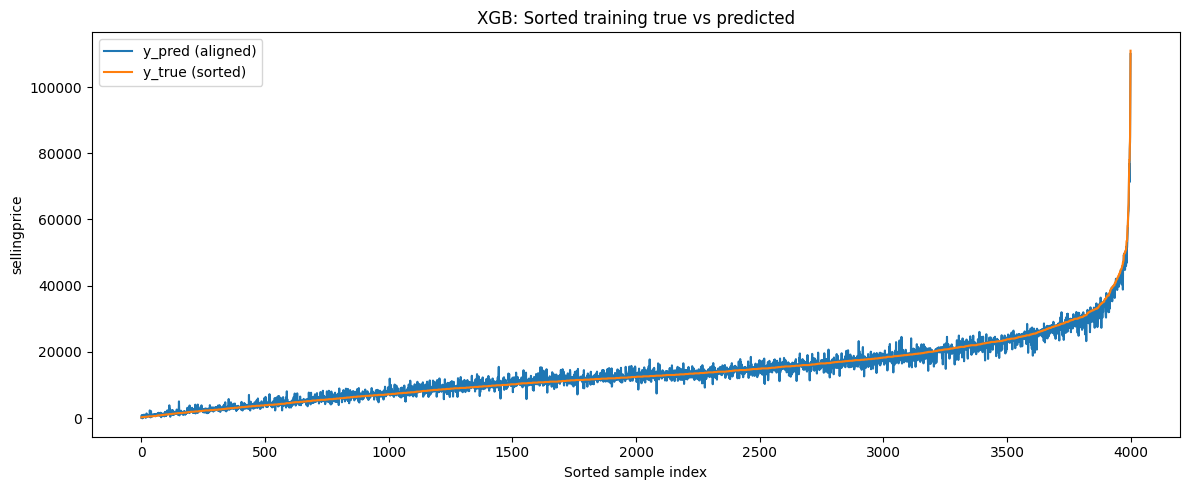

In [28]:
# Helper: plot y_true sorted, with y_pred aligned to same order
xgb_tpred = gs_xgb.best_estimator_.predict(X_train)
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.plot(y_true_sorted, label="y_true (sorted)")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_train, xgb_tpred, "XGB: Sorted training true vs predicted")

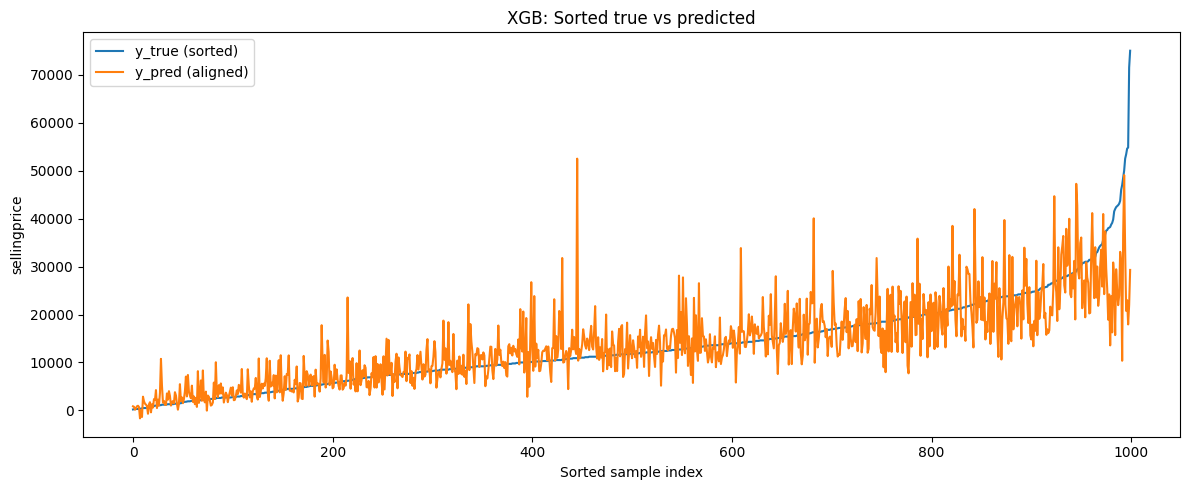

In [29]:
# Helper: plot y_true sorted, with y_pred aligned to same order
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_test, xgb_pred, "XGB: Sorted true vs predicted")

##Section 8) Model selection


##Task for question 4
### Model selection
See Politemall Q4, for more details. Save this as ipynb file and attach it to the same question.